#PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#DATA NORMALIZED

##DATA

In [ ]:
df=pd.read_excel('Data Test 4.xlsx', sheet_name = 'Data 3').set_index('nama_kabupaten_kota')
df

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan
nama_kabupaten_kota,,,,,,,
Kepulauan Seribu,68.76,0.2240,0.1031,0.4317,0.0273,0.000239,0.9710
Jakarta Selatan,74.12,0.3175,0.1368,0.5137,0.0568,0.000057,0.6148
Jakarta Timur,74.47,0.3326,0.1334,0.4591,0.0441,0.000043,0.7357
Jakarta Pusat,74.11,0.4122,0.1843,0.5662,0.0599,0.000069,0.7453
Jakarta Barat,73.62,0.3412,0.1255,0.4827,0.0401,0.000040,0.4958
...,...,...,...,...,...,...,...
Puncak,65.74,0.0973,0.0581,0.6790,0.0037,0.000000,1.0000
Dogiyai,65.73,0.1462,0.0340,0.3760,0.0115,0.000010,0.9021
Intan Jaya,65.60,0.0705,0.0601,0.8398,0.0353,0.000020,0.9902


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, Kepulauan Seribu to Kota Jayapura
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               514 non-null    float64
 1   persentase_keluhan_kesehatan     514 non-null    float64
 2   persentase_menderita_sakit       514 non-null    float64
 3   persentase_berobat_jalan         514 non-null    float64
 4   persentase_rawat_inap            514 non-null    float64
 5   fasilitas_kesehatan_per_kapita   514 non-null    float64
 6   persentase_jamkes_berobat_jalan  514 non-null    float64
dtypes: float64(7)
memory usage: 32.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

umur_harapan_hidup                 0
persentase_keluhan_kesehatan       0
persentase_menderita_sakit         0
persentase_berobat_jalan           0
persentase_rawat_inap              0
fasilitas_kesehatan_per_kapita     0
persentase_jamkes_berobat_jalan    0
dtype: int64

##DESKRIPTIF

In [ ]:
df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,69.534047,0.284564,0.136509,0.449510,0.047800,0.000064,0.537288
std,3.468444,0.082796,0.042707,0.116979,0.018959,0.000054,0.233987
min,55.270000,0.002300,0.000600,0.074600,0.000000,0.000000,0.038000
25%,67.217500,0.229225,0.103400,0.371575,0.035900,0.000029,0.327350
50%,69.870000,0.286500,0.135099,0.447400,0.047100,0.000051,0.532900
75%,71.862500,0.337850,0.167725,0.528025,0.059850,0.000084,0.722950
max,77.650000,0.572500,0.273900,0.839800,0.109000,0.000392,1.000000


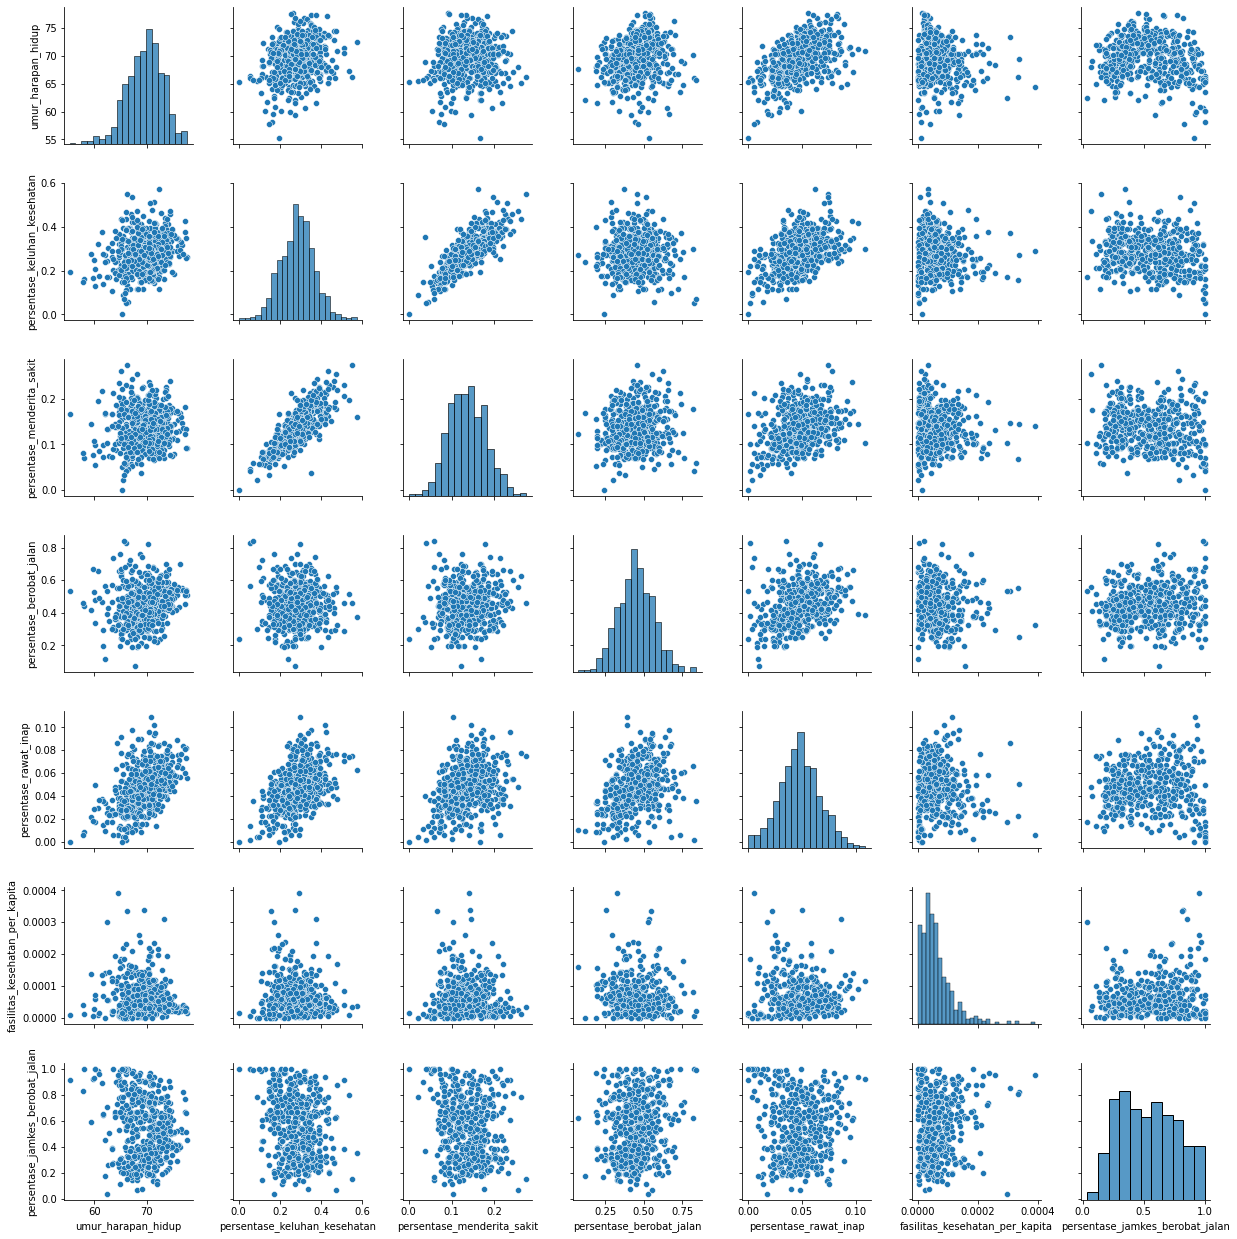

In [ ]:
sns.pairplot(df)

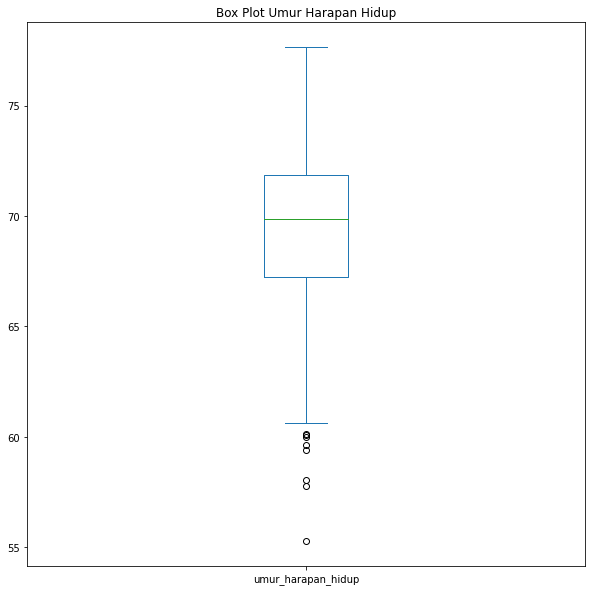

In [ ]:
df[['umur_harapan_hidup']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Umur Harapan Hidup')
plt.show()

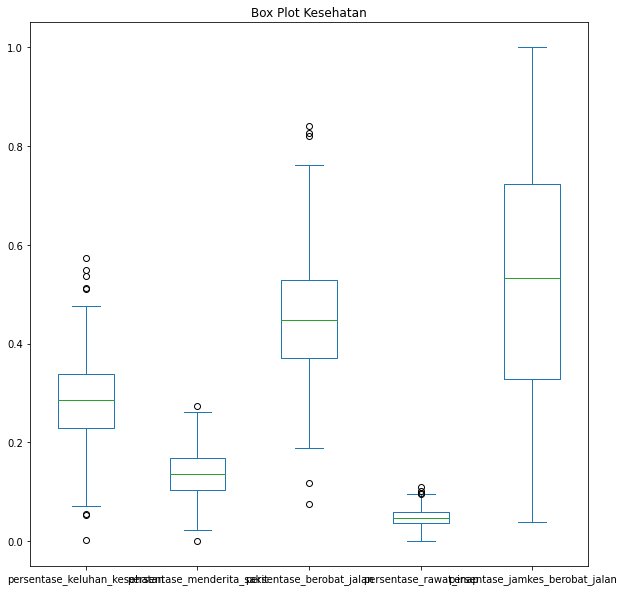

In [ ]:
df[['persentase_keluhan_kesehatan','persentase_menderita_sakit', 'persentase_berobat_jalan', 'persentase_rawat_inap','persentase_jamkes_berobat_jalan']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Kesehatan')
plt.show()

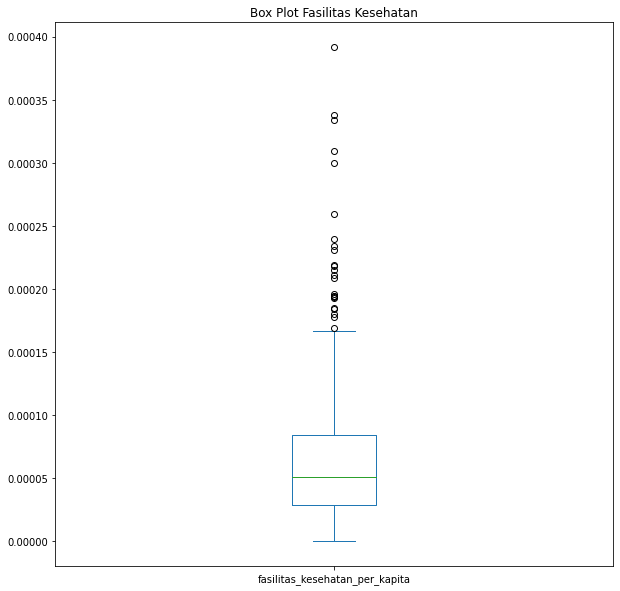

In [ ]:
df[['fasilitas_kesehatan_per_kapita']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Fasilitas Kesehatan')
plt.show()

##Outliers Before Cleaning

In [ ]:
Q1 = df['umur_harapan_hidup'].quantile(0.25)
Q3 = df['umur_harapan_hidup'].quantile(0.75)
IQR = Q3 - Q1

dfouhh1 = df['umur_harapan_hidup'][((df['umur_harapan_hidup'] < (Q1 - 1.5 * IQR)) |(df['umur_harapan_hidup'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Umur Harapan Hidup")
print(dfouhh1)
print("Total Umur Harapan Hidup Tidak Outlier", dfouhh1.shape)

Kabupaten/Kota dengan Outlier Umur Harapan Hidup
nama_kabupaten_kota
Seram Bagian Timur    59.41
Teluk Wondama         60.10
Tambrauw              60.13
Jayawijaya            59.64
Boven Digoel          59.97
Asmat                 58.05
Mamberamo Raya        57.77
Nduga                 55.27
Name: umur_harapan_hidup, dtype: float64
Total Umur Harapan Hidup Tidak Outlier (8,)


In [ ]:
Q1 = df['persentase_keluhan_kesehatan'].quantile(0.25)
Q3 = df['persentase_keluhan_kesehatan'].quantile(0.75)
IQR = Q3 - Q1

dfopkk1 = df['persentase_keluhan_kesehatan'][((df['persentase_keluhan_kesehatan'] < (Q1 - 1.5 * IQR)) |(df['persentase_keluhan_kesehatan'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Keluhan Kesehatan")
print(dfopkk1)
print("Total Keluhan Kesehatan Tidak Outlier", dfopkk1.shape)

Kabupaten/Kota dengan Outlier Keluhan Kesehatan
nama_kabupaten_kota
KABUPATEN PANGANDARAN      0.5130
Kabupaten Jombang          0.5725
Kabupaten Lombok Tengah    0.5492
Sikka                      0.5359
Bantaeng                   0.5105
Paniai                     0.0543
Lanny Jaya                 0.0529
Deiyai                     0.0023
Name: persentase_keluhan_kesehatan, dtype: float64
Total Keluhan Kesehatan Tidak Outlier (8,)


In [ ]:
Q1 = df['persentase_menderita_sakit'].quantile(0.25)
Q3 = df['persentase_menderita_sakit'].quantile(0.75)
IQR = Q3 - Q1

dfopms1 = df['persentase_menderita_sakit'][((df['persentase_menderita_sakit'] < (Q1 - 1.5 * IQR)) |(df['persentase_menderita_sakit'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Menderita Sakit")
print(dfopms1)
print("Total Menderita Sakit Tidak Outlier", dfopms1.shape)

Kabupaten/Kota dengan Outlier Menderita Sakit
nama_kabupaten_kota
Kabupaten Lombok Tengah    0.2739
Deiyai                     0.0006
Name: persentase_menderita_sakit, dtype: float64
Total Menderita Sakit Tidak Outlier (2,)


In [ ]:
Q1 = df['persentase_berobat_jalan'].quantile(0.25)
Q3 = df['persentase_berobat_jalan'].quantile(0.75)
IQR = Q3 - Q1

dfopbj1 = df['persentase_berobat_jalan'][((df['persentase_berobat_jalan'] < (Q1 - 1.5 * IQR)) |(df['persentase_berobat_jalan'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Berobat Jalan")
print(dfopbj1)
print("Total Berobat Jalan Tidak Outlier", dfopbj1.shape)

Kabupaten/Kota dengan Outlier Berobat Jalan
nama_kabupaten_kota
PIDIE JAYA       0.8205
Buton Tengah     0.0746
Pulau Taliabu    0.1176
Lanny Jaya       0.8255
Intan Jaya       0.8398
Name: persentase_berobat_jalan, dtype: float64
Total Berobat Jalan Tidak Outlier (5,)


In [ ]:
Q1 = df['persentase_rawat_inap'].quantile(0.25)
Q3 = df['persentase_rawat_inap'].quantile(0.75)
IQR = Q3 - Q1

dfopri1 = df['persentase_rawat_inap'][((df['persentase_rawat_inap'] < (Q1 - 1.5 * IQR)) |(df['persentase_rawat_inap'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Rawat Inap")
print(dfopri1)
print("Total Rawat Inap Tidak Outlier", dfopri1.shape)

Kabupaten/Kota dengan Outlier Rawat Inap
nama_kabupaten_kota
ACEH JAYA    0.0976
Kota Bima    0.0964
Pare Pare    0.1020
Palopo       0.1090
Name: persentase_rawat_inap, dtype: float64
Total Rawat Inap Tidak Outlier (4,)


In [ ]:
Q1 = df['persentase_jamkes_berobat_jalan'].quantile(0.25)
Q3 = df['persentase_jamkes_berobat_jalan'].quantile(0.75)
IQR = Q3 - Q1

dfopri1 = df['persentase_jamkes_berobat_jalan'][((df['persentase_jamkes_berobat_jalan'] < (Q1 - 1.5 * IQR)) |(df['persentase_jamkes_berobat_jalan'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier JamKes Berobat Jalan")
print(dfopri1)
print("Total JamKes Berobat Jalan Tidak Outlier", dfopri1.shape)

Kabupaten/Kota dengan Outlier JamKes Berobat Jalan
Series([], Name: persentase_jamkes_berobat_jalan, dtype: float64)
Total JamKes Berobat Jalan Tidak Outlier (0,)


In [ ]:
Q1 = df['fasilitas_kesehatan_per_kapita'].quantile(0.25)
Q3 = df['fasilitas_kesehatan_per_kapita'].quantile(0.75)
IQR = Q3 - Q1

dfojfk1 = df['fasilitas_kesehatan_per_kapita'][((df['fasilitas_kesehatan_per_kapita'] < (Q1 - 1.5 * IQR)) |(df['fasilitas_kesehatan_per_kapita'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Fasilitas Kesehatan")
print(dfojfk1)
print("Total Fasilitas Kesehatan Tidak Outlier", dfojfk1.shape)

Kabupaten/Kota dengan Outlier Fasilitas Kesehatan
nama_kabupaten_kota
Kepulauan Seribu      0.000239
Kota Blitar           0.000194
Kota Mojokerto        0.000310
SABANG                0.000194
Natuna                0.000184
Kepulauan Anambas     0.000211
Kota Sungai Penuh     0.000196
Mahakam Ulu           0.000215
Tana Tidung           0.000234
Kepulauan Talaud      0.000180
Kepulauan Sitaro      0.000209
Wakatobi              0.000218
Buton Utara           0.000169
Konawe Utara          0.000338
Konawe Kepulauan      0.000260
Muna Barat            0.000193
Maluku Barat Daya     0.000300
Tual                  0.000219
Halmahera Tengah      0.000193
Kaimana               0.000178
Sorong Selatan        0.000334
Sorong                0.000230
Pegunungan Bintang    0.000392
Tolikara              0.000185
Name: fasilitas_kesehatan_per_kapita, dtype: float64
Total Fasilitas Kesehatan Tidak Outlier (24,)


##CLEANING & SCALING

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("Kabupaten/Kota yang Memiliki Nilai Outlier:")
print(df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)])
print('\n')
df = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
print("Kabupaten/Kota Shape Setelah Membuang Ouliers:", df.shape)

Kabupaten/Kota yang Memiliki Nilai Outlier:
                         umur_harapan_hidup  persentase_keluhan_kesehatan  \
nama_kabupaten_kota                                                         
Kepulauan Seribu                      68.76                        0.2240   
KABUPATEN PANGANDARAN                 71.40                        0.5130   
Kabupaten Jombang                     72.40                        0.5725   
Kota Blitar                           73.75                        0.4343   
Kota Mojokerto                        73.32                        0.3733   
ACEH JAYA                             67.16                        0.3508   
PIDIE JAYA                            70.14                        0.2988   
SABANG                                70.51                        0.2466   
Natuna                                65.06                        0.2238   
Kepulauan Anambas                     67.21                        0.1917   
Kota Sungai Penuh               

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, Jakarta Selatan to Kota Jayapura
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               466 non-null    float64
 1   persentase_keluhan_kesehatan     466 non-null    float64
 2   persentase_menderita_sakit       466 non-null    float64
 3   persentase_berobat_jalan         466 non-null    float64
 4   persentase_rawat_inap            466 non-null    float64
 5   fasilitas_kesehatan_per_kapita   466 non-null    float64
 6   persentase_jamkes_berobat_jalan  466 non-null    float64
dtypes: float64(7)
memory usage: 29.1+ KB


In [ ]:
df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,69.818927,0.286270,0.137461,0.448521,0.048588,0.000055,0.517506
std,3.202363,0.075307,0.040900,0.111611,0.017331,0.000037,0.221405
min,60.640000,0.089600,0.022800,0.188000,0.003700,0.000000,0.067100
25%,67.660000,0.235675,0.108225,0.371350,0.037625,0.000028,0.320600
50%,69.980000,0.289100,0.136650,0.446800,0.047650,0.000048,0.509450
75%,72.060000,0.337550,0.167800,0.527000,0.059850,0.000076,0.681000
max,77.650000,0.473600,0.260900,0.761700,0.095000,0.000167,1.000000


In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)

In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               466 non-null    float64
 1   persentase_keluhan_kesehatan     466 non-null    float64
 2   persentase_menderita_sakit       466 non-null    float64
 3   persentase_berobat_jalan         466 non-null    float64
 4   persentase_rawat_inap            466 non-null    float64
 5   fasilitas_kesehatan_per_kapita   466 non-null    float64
 6   persentase_jamkes_berobat_jalan  466 non-null    float64
dtypes: float64(7)
memory usage: 25.6 KB


In [ ]:
scaled_df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,0.539619,0.512161,0.481567,0.454106,0.491654,0.333083,0.482802
std,0.188264,0.196112,0.171777,0.194546,0.189828,0.222850,0.237330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.412698,0.380404,0.358778,0.319592,0.371577,0.167718,0.271733
50%,0.549089,0.519531,0.478160,0.451107,0.481380,0.288986,0.474167
75%,0.671370,0.645703,0.608988,0.590901,0.615005,0.457364,0.658056
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Independent vs Dependent Graph After Scaling

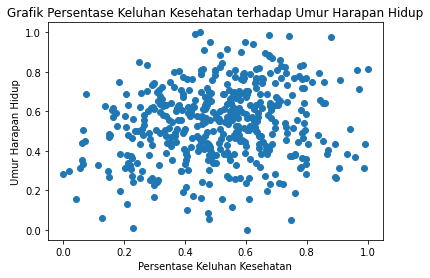

In [ ]:
# x axis values
x = scaled_df['persentase_keluhan_kesehatan']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Keluhan Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Keluhan Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

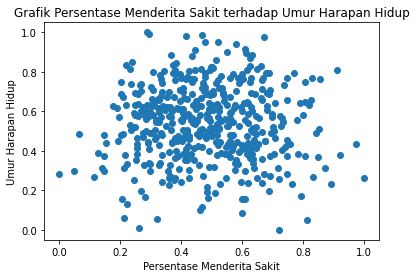

In [ ]:
# x axis values
x = scaled_df['persentase_menderita_sakit']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Menderita Sakit')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Menderita Sakit terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

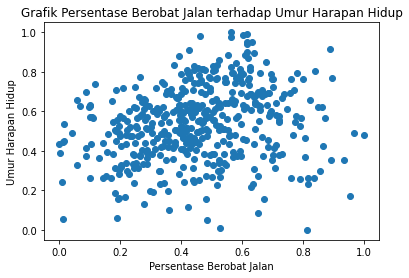

In [ ]:
# x axis values
x = scaled_df['persentase_berobat_jalan']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

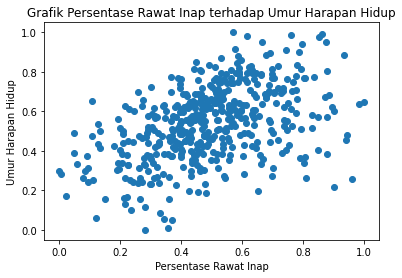

In [ ]:
# x axis values
x = scaled_df['persentase_rawat_inap']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Rawat Inap')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Rawat Inap terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

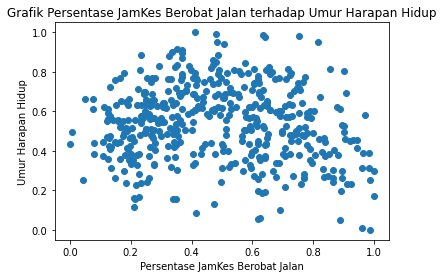

In [ ]:
# x axis values
x = scaled_df['persentase_jamkes_berobat_jalan']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase JamKes Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase JamKes Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

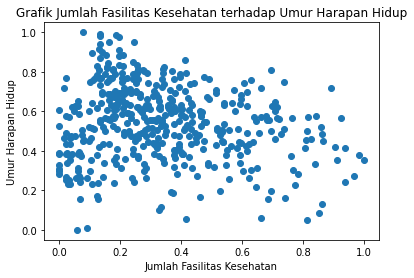

In [ ]:
# x axis values
x = scaled_df['fasilitas_kesehatan_per_kapita']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Jumlah Fasilitas Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Jumlah Fasilitas Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

##QQ Plot After Scaling

In [ ]:
import pylab as py

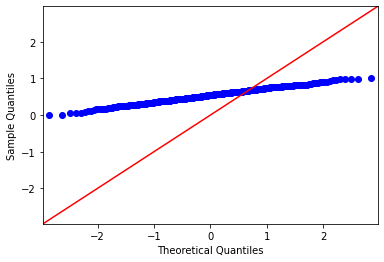

In [ ]:
sm.qqplot(scaled_df['umur_harapan_hidup'], line ='45')
py.show()

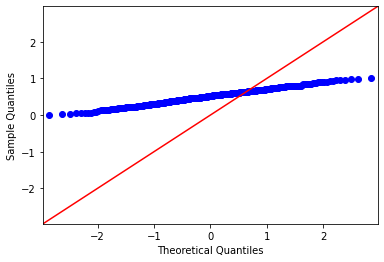

In [ ]:
sm.qqplot(scaled_df['persentase_keluhan_kesehatan'], line ='45')
py.show()

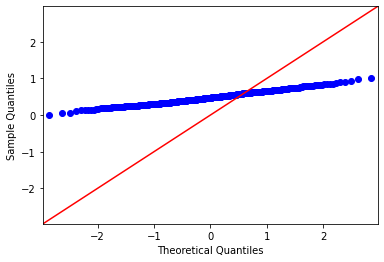

In [ ]:
sm.qqplot(scaled_df['persentase_menderita_sakit'], line ='45')
py.show()

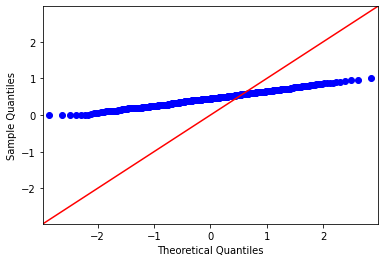

In [ ]:
sm.qqplot(scaled_df['persentase_berobat_jalan'], line ='45')
py.show()

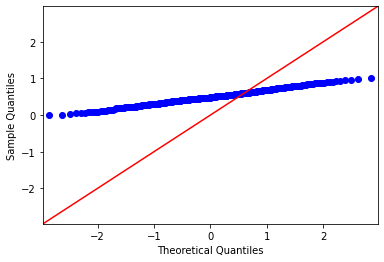

In [ ]:
sm.qqplot(scaled_df['persentase_rawat_inap'], line ='45')
py.show()

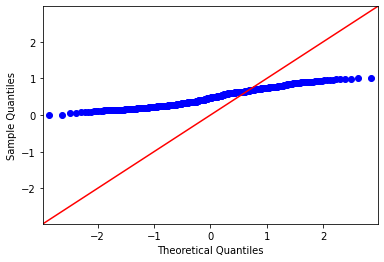

In [ ]:
sm.qqplot(scaled_df['persentase_jamkes_berobat_jalan'], line ='45')
py.show()

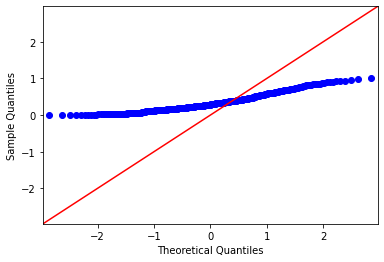

In [ ]:
sm.qqplot(scaled_df['fasilitas_kesehatan_per_kapita'], line ='45')
py.show()

##Z-ING

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler2 = StandardScaler()
names2 = scaled_df.columns
d2 = scaler2.fit_transform(scaled_df)
z_scaled_df = pd.DataFrame(d2, columns = names)

In [ ]:
z_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               466 non-null    float64
 1   persentase_keluhan_kesehatan     466 non-null    float64
 2   persentase_menderita_sakit       466 non-null    float64
 3   persentase_berobat_jalan         466 non-null    float64
 4   persentase_rawat_inap            466 non-null    float64
 5   fasilitas_kesehatan_per_kapita   466 non-null    float64
 6   persentase_jamkes_berobat_jalan  466 non-null    float64
dtypes: float64(7)
memory usage: 25.6 KB


In [ ]:
z_scaled_df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan
count,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02
mean,-1.527748e-16,-8.243287e-17,1.634363e-16,4.555250e-16,9.625109e-17,2.082264e-16,2.897063e-16
std,1.001075e+00,1.001075e+00,1.001075e+00,1.001075e+00,1.001075e+00,1.001075e+00,1.001075e+00
min,-2.869378e+00,-2.614376e+00,-2.806464e+00,-2.336696e+00,-2.592780e+00,-1.496257e+00,-2.036491e+00
25%,-6.748914e-01,-6.725676e-01,-7.155891e-01,-6.921701e-01,-6.332342e-01,-7.428441e-01,-8.903026e-01
50%,5.035221e-02,3.762327e-02,-1.985476e-02,-1.543455e-02,-5.417894e-02,-1.980917e-01,-3.642585e-02
75%,7.005706e-01,6.816804e-01,7.425771e-01,7.039053e-01,6.505068e-01,5.582886e-01,7.392297e-01
max,2.448033e+00,2.490225e+00,3.021306e+00,2.809006e+00,2.680810e+00,2.995885e+00,2.181574e+00


##Independent vs Dependent Graph After Scaling & Z-ing

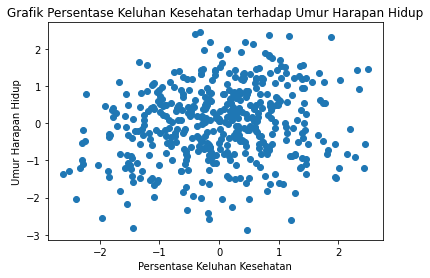

In [ ]:
# x axis values
x = z_scaled_df['persentase_keluhan_kesehatan']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Keluhan Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Keluhan Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

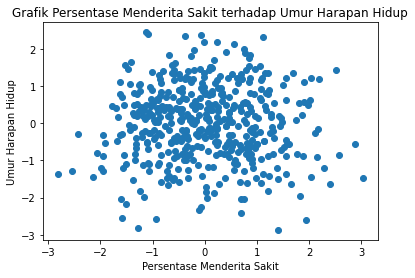

In [ ]:
# x axis values
x = z_scaled_df['persentase_menderita_sakit']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Menderita Sakit')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Menderita Sakit terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

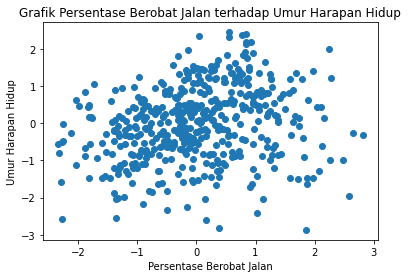

In [ ]:
# x axis values
x = z_scaled_df['persentase_berobat_jalan']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

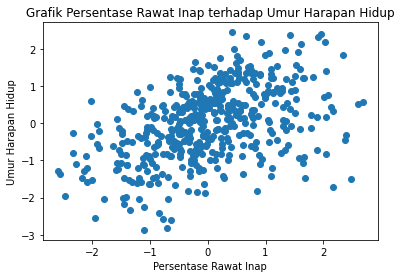

In [ ]:
# x axis values
x = z_scaled_df['persentase_rawat_inap']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Rawat Inap')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Rawat Inap terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

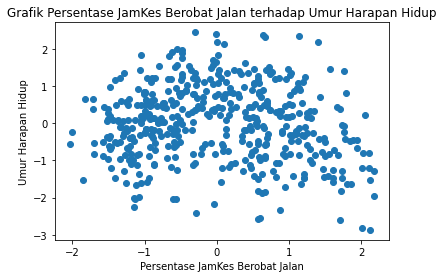

In [ ]:
# x axis values
x = z_scaled_df['persentase_jamkes_berobat_jalan']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase JamKes Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase JamKes Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

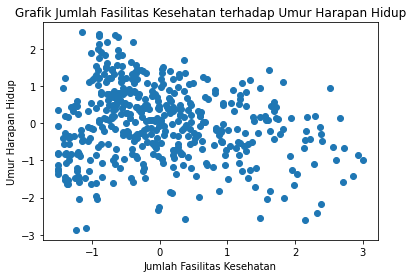

In [ ]:
# x axis values
x = z_scaled_df['fasilitas_kesehatan_per_kapita']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Jumlah Fasilitas Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Jumlah Fasilitas Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

##QQ Plot After Scaling & Z-ing

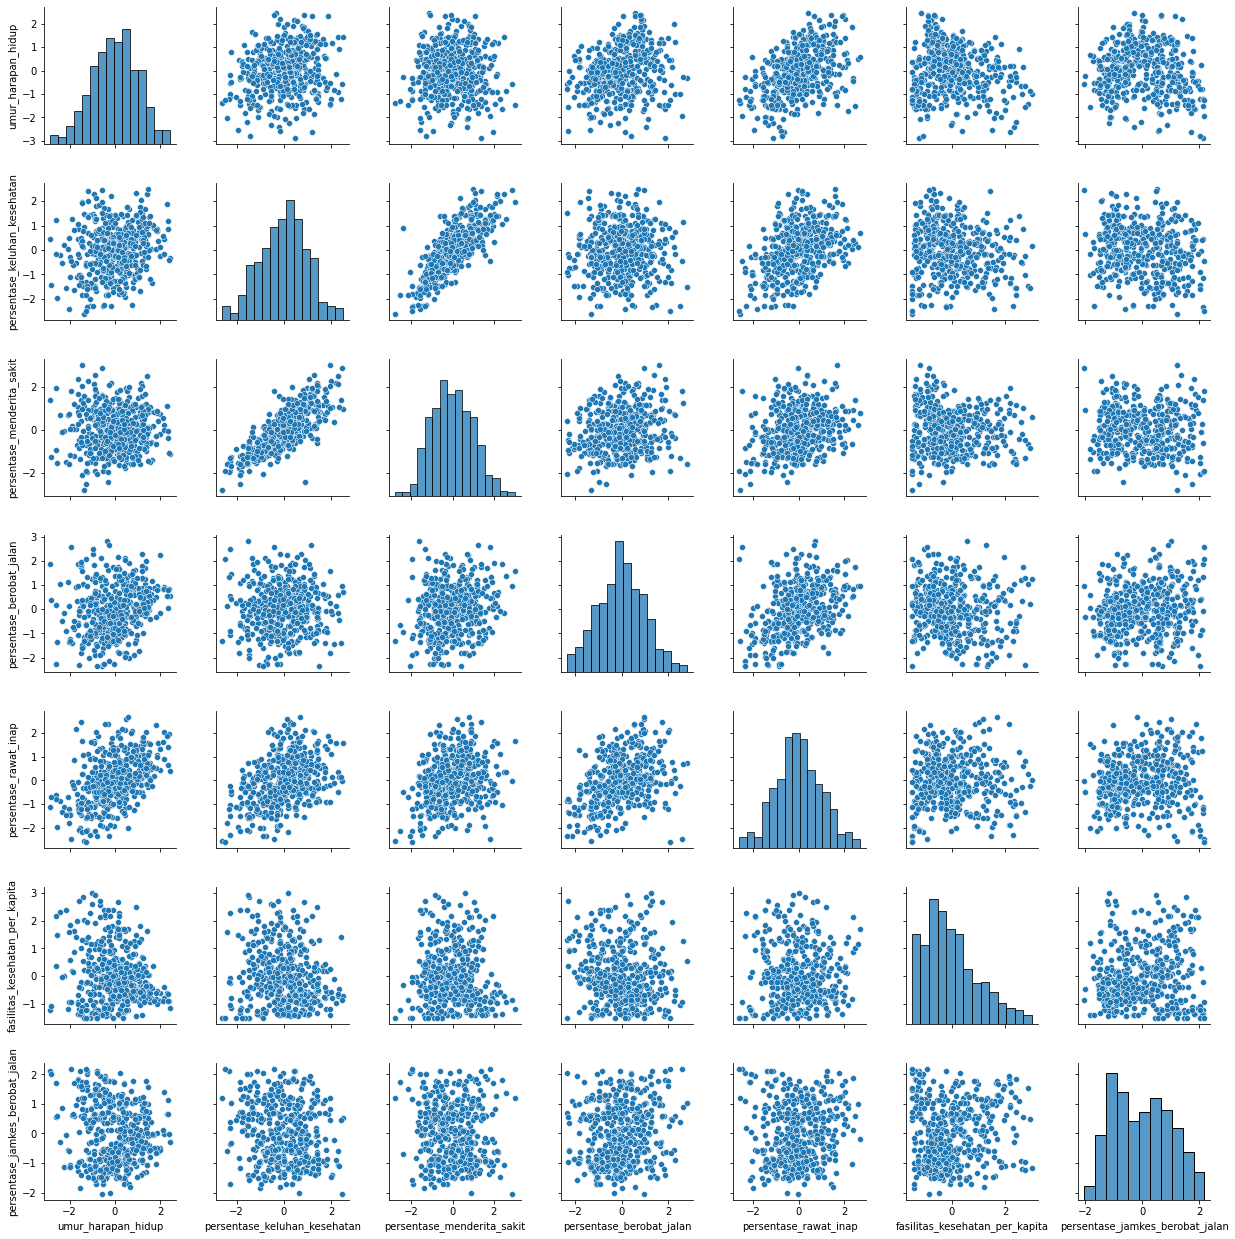

In [ ]:
sns.pairplot(z_scaled_df)

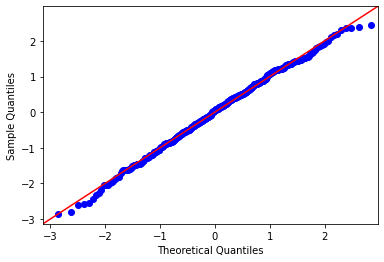

In [ ]:
sm.qqplot(z_scaled_df['umur_harapan_hidup'], line ='45')
py.show()

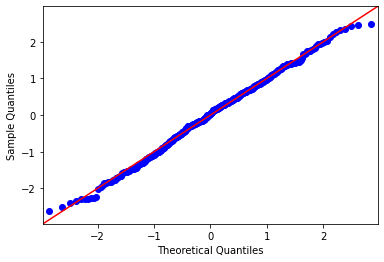

In [ ]:
sm.qqplot(z_scaled_df['persentase_keluhan_kesehatan'], line ='45')
py.show()

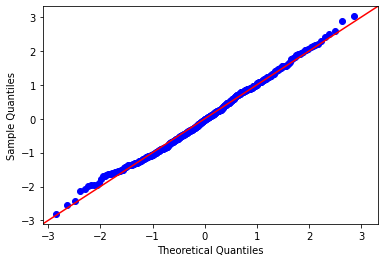

In [ ]:
sm.qqplot(z_scaled_df['persentase_menderita_sakit'], line ='45')
py.show()

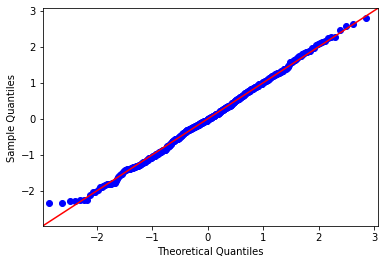

In [ ]:
sm.qqplot(z_scaled_df['persentase_berobat_jalan'], line ='45')
py.show()

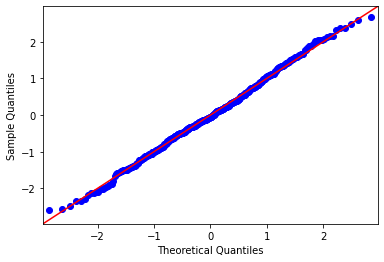

In [ ]:
sm.qqplot(z_scaled_df['persentase_rawat_inap'], line ='45')
py.show()

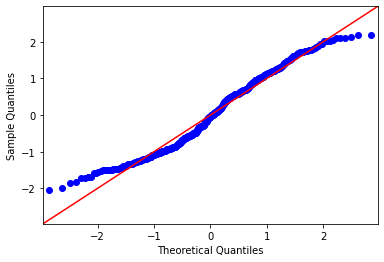

In [ ]:
sm.qqplot(z_scaled_df['persentase_jamkes_berobat_jalan'], line ='45')
py.show()

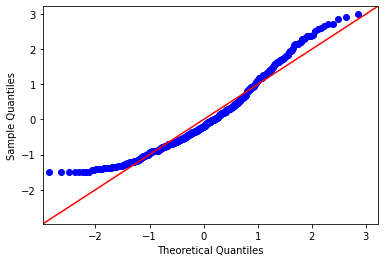

In [ ]:
sm.qqplot(z_scaled_df['fasilitas_kesehatan_per_kapita'], line ='45')
py.show()

##UJI ASUMSI KLASIK

###Scaling

In [ ]:
#Normality test

from scipy.stats import anderson

result = anderson(scaled_df['umur_harapan_hidup'])
print ('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print (f'Berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')
  else:
    print (f'Tidak berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')

#Tidak bisa membedakan normal/exponential

stat=0.327
Berdistribusi Normal : 0.571 critical value at 15.0 level of significance
Berdistribusi Normal : 0.65 critical value at 10.0 level of significance
Berdistribusi Normal : 0.78 critical value at 5.0 level of significance
Berdistribusi Normal : 0.91 critical value at 2.5 level of significance
Berdistribusi Normal : 1.083 critical value at 1.0 level of significance


In [ ]:
#Normality test

from scipy.stats import kstest

stat, p = kstest(scaled_df['umur_harapan_hidup'],'norm')
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Paling cocok untuk regression, bisa untuk >100

stat=0.547, p=0.000

Tidak berdistribusi Normal


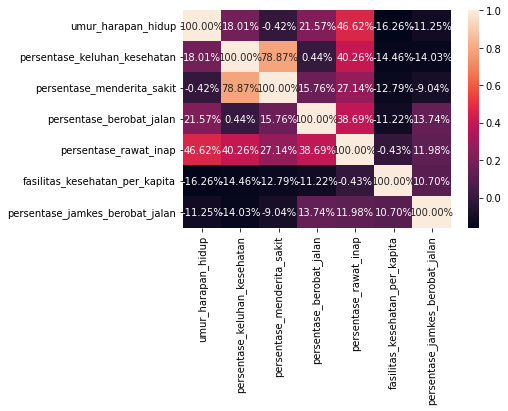

In [ ]:
#Linearity test
corr = scaled_df.corr()
hmcorr = sns.heatmap(corr, annot=True, fmt='.2%')
hmcorr
plt.show()

In [ ]:
#Multicollinearity test
features = ['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']

X = scaled_df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_keluhan_kesehatan,25.955111
1,persentase_menderita_sakit,25.694463
2,persentase_rawat_inap,12.072077
3,persentase_berobat_jalan,7.920392
4,persentase_jamkes_berobat_jalan,4.694647
5,fasilitas_kesehatan_per_kapita,2.872002


In [ ]:
#Multicollinearity test 2
features = ['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']

X = scaled_df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_rawat_inap,9.284166
1,persentase_berobat_jalan,7.188856
2,persentase_menderita_sakit,6.912516
3,persentase_jamkes_berobat_jalan,4.683750
4,fasilitas_kesehatan_per_kapita,2.868252


In [ ]:
#define response variable
y = scaled_df['umur_harapan_hidup']

#define predictor variables
x = scaled_df[['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 34.94042278160455, 'Test Statistic p-value': 0.020423885327318755, 'F-Statistic': 1.8035196246128664, 'F-Test p-value': 0.018185585294422102}


###Scaling & Z-ing

In [ ]:
#Normality test

from scipy.stats import anderson

result = anderson(z_scaled_df['umur_harapan_hidup'])
print ('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print (f'Berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')
  else:
    print (f'Tidak berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')

#Tidak bisa membedakan normal/exponential

stat=0.327
Berdistribusi Normal : 0.571 critical value at 15.0 level of significance
Berdistribusi Normal : 0.65 critical value at 10.0 level of significance
Berdistribusi Normal : 0.78 critical value at 5.0 level of significance
Berdistribusi Normal : 0.91 critical value at 2.5 level of significance
Berdistribusi Normal : 1.083 critical value at 1.0 level of significance


In [ ]:
#Normality test

from scipy.stats import kstest

stat, p = kstest(z_scaled_df['umur_harapan_hidup'],'norm')
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Paling cocok untuk regression, bisa untuk >100

stat=0.026, p=0.922

Berdistribusi Normal


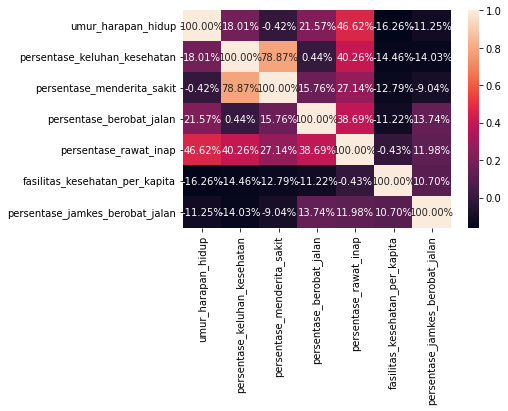

In [ ]:
#Linearity test
corr = z_scaled_df.corr()
hmcorr = sns.heatmap(corr, annot=True, fmt='.2%')
hmcorr
plt.show()

In [ ]:
#Multicollinearity test
features = ['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']

X = z_scaled_df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_keluhan_kesehatan,3.489582
1,persentase_menderita_sakit,2.962924
2,persentase_rawat_inap,1.574986
3,persentase_berobat_jalan,1.388166
4,persentase_jamkes_berobat_jalan,1.074156
5,fasilitas_kesehatan_per_kapita,1.058690


In [ ]:
#define response variable
y = z_scaled_df['umur_harapan_hidup']

#define predictor variables
x = z_scaled_df[['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 38.550806483406724, 'Test Statistic p-value': 0.06955986870466241, 'F-Statistic': 1.463050484373957, 'F-Test p-value': 0.06486966495319882}


##ANALISIS REGRESI

###Scaling

In [ ]:
X = sm.add_constant(scaled_df[['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']].to_numpy())
y = scaled_df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     39.47
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           9.71e-34
Time:                        14:26:03   Log-Likelihood:                 200.63
No. Observations:                 466   AIC:                            -389.3
Df Residuals:                     460   BIC:                            -364.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4786      0.034     14.227      0.0

In [ ]:
X = sm.add_constant(scaled_df[['persentase_menderita_sakit','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']].to_numpy())
y = scaled_df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     48.92
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           2.67e-34
Time:                        14:26:15   Log-Likelihood:                 199.89
No. Observations:                 466   AIC:                            -389.8
Df Residuals:                     461   BIC:                            -369.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4903      0.032     15.210      0.0

###Scaling & Z-ing

In [ ]:
X = sm.add_constant(z_scaled_df[['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']].to_numpy())
y = z_scaled_df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     35.74
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.71e-35
Time:                        14:26:45   Log-Likelihood:                -571.91
No. Observations:                 466   AIC:                             1158.
Df Residuals:                     459   BIC:                             1187.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e-16      0.039   5.54e-15      1.0

In [72]:
#define response variable
y = z_scaled_df['umur_harapan_hidup']

#define predictor variables
x = z_scaled_df[['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [73]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 38.550806483406724, 'Test Statistic p-value': 0.06955986870466241, 'F-Statistic': 1.463050484373957, 'F-Test p-value': 0.06486966495319882}
